1. VIẾT CHƯƠNG TRÌNH BIẾN ĐỔI ẢNH

1.1 Chọn đối tượng trong ảnh

(1427, 2100, 3)


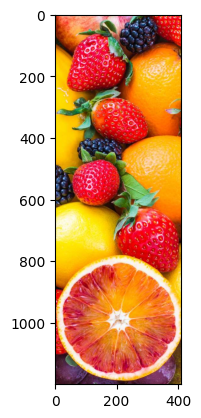

In [5]:
import numpy as np 
import imageio.v2 as iio  
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')       
bmg = data[000:1200, 570:980]        
print(data.shape)

iio.imsave('orange.jpg', bmg)        
plt.imshow(bmg)                      
plt.show()


1.2 Tịnh tiến đơn

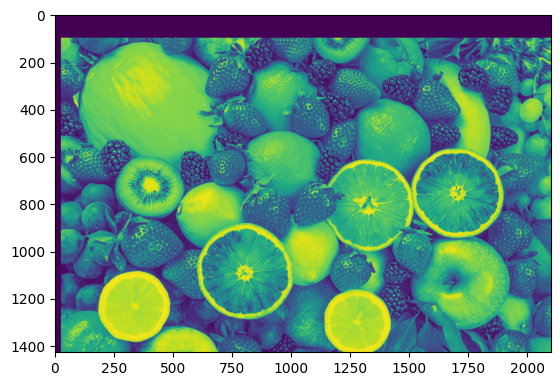

In [12]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg', mode='F')
bdata = nd.shift(data, (100, 25))

plt.imshow(bdata)
plt.show()



1.3 Thay đổi kích thước ảnh 

(1427, 2100, 3)
(2854, 4200, 6)
(2854, 4200, 3)


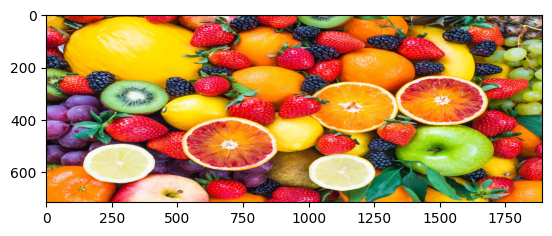

In [13]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
print(data.shape)
bdata = nd.zoom(data, 2)
print(bdata.shape)
data2 = nd.zoom (data, (2, 2, 1))
print(data2.shape)
data3 = nd.zoom(data, (0.5, 0.9, 1))
plt.imshow(data3)
plt.show()

1.4 Xoay ảnh

(1427, 2100, 3)


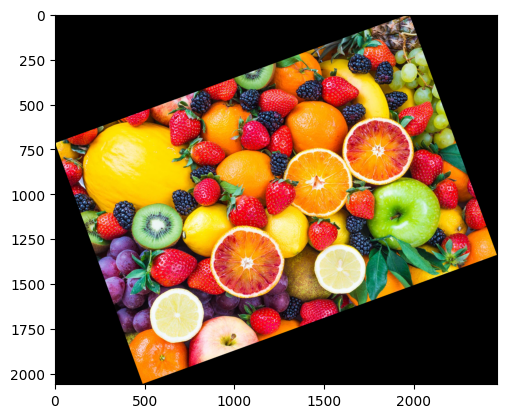

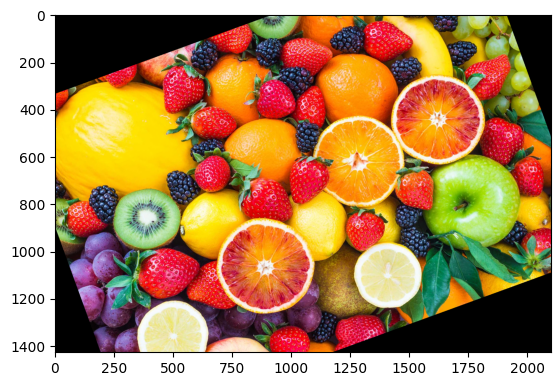

In [14]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
print(data.shape)

d1 = nd.rotate(data, 20)
plt.imshow(d1)
plt.show()

d2 = nd.rotate(data, 20, reshape=False)
plt.imshow(d2)
plt.show()
           

1.5 Dilation và Erosion 

(1427, 2100)


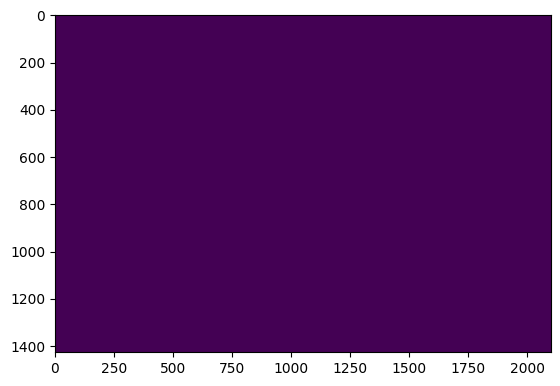

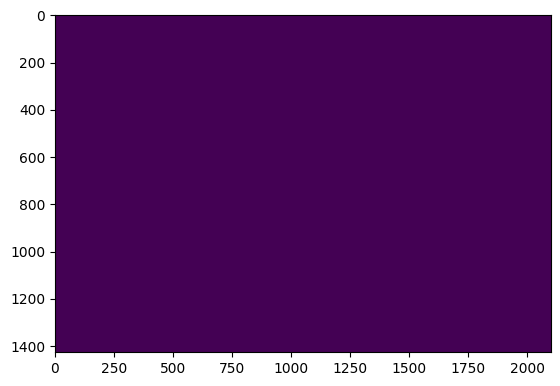

In [18]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg', mode = 'F')
print(data.shape)

d1 = nd.binary_dilation(data)
plt.imshow(d1)
plt.show()

d2 = nd.binary_dilation(data, iterations=3)
plt.imshow(d2)
plt.show()

1.6 Coordinate Mapping

(309, 515)


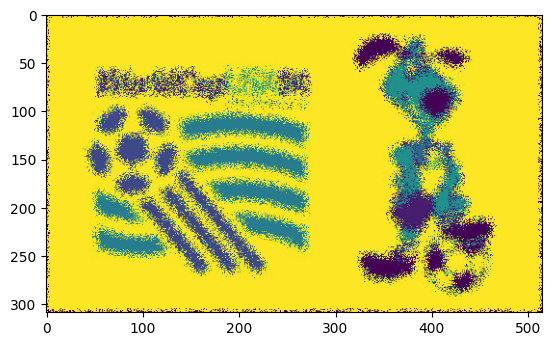

In [22]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('world_cup.jpg', mode = 'F')
print(data.shape)
V, H = data.shape

M = np.indices((V, H))

d = 5
q = 2 * d * np.random.ranf(M.shape) - d
mp = (M + q). astype (int)
d1 = nd.map_coordinates(data, mp)
plt.imshow(d1)
plt.show()

1.7 Biến đổi chung (Generic Transformation)

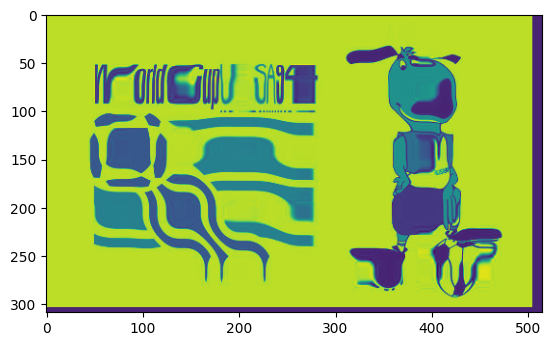

In [24]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

def GeoFun(outcoord):
    a = 10 * np.cos(outcoord[0]/10.0) + outcoord[0]
    b = 10 * np.cos(outcoord[1]/10.0) + outcoord[1]
    return a, b

data = iio.imread('world_cup.jpg', mode = 'F')

d1 = nd.geometric_transform(data, GeoFun)
plt.imshow(d1)
plt.show()


2. BÀI TẬP

1.

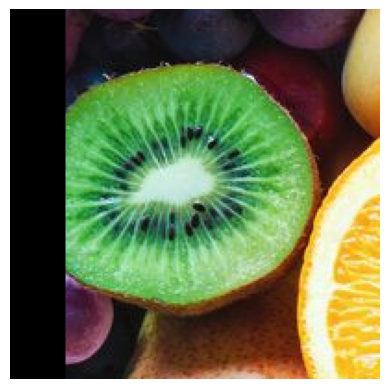

In [25]:
import imageio.v2 as iio
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import shift

img = iio.imread('exercise/colorful-ripe-tropical-fruits.jpg')

kiwi = img[100:300, 150:350]  

kiwi_shifted = shift(kiwi, shift=(0, 30, 0))  

plt.imshow(kiwi_shifted.astype(np.uint8))
plt.axis('off')
plt.savefig('kiwi_shifted.jpg')
plt.show()


2.

In [27]:
img = iio.imread('exercise/colorful-ripe-tropical-fruits.jpg')

papaya = img[50:250, 400:600]
watermelon = img[200:400, 50:250]

papaya_changed = papaya[:, :, ::-1]
watermelon_changed = watermelon[:, :, ::-1]

iio.imsave('papaya_changed.jpg', papaya_changed)
iio.imsave('watermelon_changed.jpg', watermelon_changed)


3.

In [28]:
from scipy.ndimage import rotate

img = iio.imread('exercise/quang_ninh.jpg')

mountain = img[100:300, 50:250]
boat = img[350:500, 200:400]

mountain_rot = rotate(mountain, 45, reshape=True)
boat_rot = rotate(boat, 45, reshape=True)

iio.imsave('mountain_rotated.jpg', mountain_rot.astype(np.uint8))
iio.imsave('boat_rotated.jpg', boat_rot.astype(np.uint8))


4.

In [29]:
from scipy.ndimage import zoom

img = iio.imread('exercise/pagoda.jpg')

pagoda = img[100:300, 100:300]

# Phóng to 5 lần 
pagoda_zoomed = zoom(pagoda, (5, 5, 1))

iio.imsave('pagoda_zoomed.jpg', pagoda_zoomed.astype(np.uint8))


5.

Menu:
T - Tịnh tiến
X - Xoay
P - Phóng to
H - Thu nhỏ
C - Coordinate Map
Chọn ảnh để thao tác:
1 - exercise/colorful-ripe-tropical-fruits.jpg
2 - exercise/quang_ninh.jpg
3 - exercise/pagoda.jpg


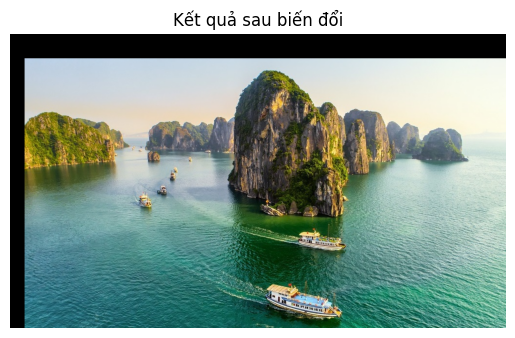

Đã lưu kết quả vào 'result.jpg'


In [30]:
import imageio.v2 as iio
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import shift, rotate, zoom, geometric_transform

image_paths = {
    "1": "exercise/colorful-ripe-tropical-fruits.jpg",
    "2": "exercise/quang_ninh.jpg",
    "3": "exercise/pagoda.jpg"
}

def load_image():
    print("Chọn ảnh để thao tác:")
    for key, path in image_paths.items():
        print(f"{key} - {path}")
    choice = input("Nhập số (1-3): ").strip()
    return iio.imread(image_paths.get(choice, list(image_paths.values())[0]))

def coord_map(outcoord):
    a = 10 * np.cos(outcoord[0] / 10.0) + outcoord[0]
    b = 10 * np.cos(outcoord[1] / 10.0) + outcoord[1]
    return a, b

def process_image(img, option):
    if option == 'T':  # Tịnh tiến
        return shift(img, shift=(50, 30, 0))  # Dịch 50 pixel dọc, 30 pixel ngang
    elif option == 'X':  # Xoay
        return rotate(img, angle=45, reshape=True)
    elif option == 'P':  # Phóng to
        return zoom(img, zoom=(1.5, 1.5, 1))
    elif option == 'H':  # Thu nhỏ
        return zoom(img, zoom=(0.5, 0.5, 1))
    elif option == 'C':  # Coordinate Map
        return geometric_transform(img, coord_map)
    else:
        print("Lựa chọn không hợp lệ.")
        return img

print("Menu:")
print("T - Tịnh tiến")
print("X - Xoay")
print("P - Phóng to")
print("H - Thu nhỏ")
print("C - Coordinate Map")

choice = input("Nhập lựa chọn của bạn (T/X/P/H/C): ").upper()
image = load_image()
result = process_image(image, choice)

# Hiển thị kết quả
plt.imshow(result.astype(np.uint8))
plt.axis('off')
plt.title("Kết quả sau biến đổi")
plt.show()

# Lưu ảnh kết quả
iio.imsave('result.jpg', result.astype(np.uint8))
print("Đã lưu kết quả vào 'result.jpg'")
